# Health and Social Media. 

### Processing

In [1]:
import pandas as pd # data processing
import matplotlib.pyplot as mp #plotting

In [2]:
df = pd.read_csv("/kaggle/input/social-media-and-mental-health/smmh.csv")
platform_wide = pd.read_csv("/kaggle/input/platform-list-wide/socialMediaPlatformsUsed.csv")
platform_wide.head()

,id,platforms_used,plat1,plat2,plat3,plat4,plat5,plat6,plat7,plat8,plat9
0,0,"Facebook, Twitter, Instagram, YouTube, Discord...",Facebook,Twitter,Instagram,YouTube,Discord,Reddit,NaN,NaN,NaN
1,1,"Facebook, Twitter, Instagram, YouTube, Discord...",Facebook,Twitter,Instagram,YouTube,Discord,Reddit,NaN,NaN,NaN
2,2,"Facebook, Instagram, YouTube, Pinterest",Facebook,Instagram,YouTube,Pinterest,NaN,NaN,NaN,NaN,NaN
3,3,"Facebook, Instagram",Facebook,Instagram,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Facebook, Instagram, YouTube",Facebook,Instagram,YouTube,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Processing

- Reformat dates
- Ages data type change to ints.
- Change column names for readability
- Remove null values
- Convert Wide platform data to long

# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

### Column Renaming for easier recall:

In [4]:
df = df.rename(columns = {'Timestamp': 'timestamp',
                    '1. What is your age?':'age','2. Gender':'gender',
                     '3. Relationship Status':'relationship_status',
                     '4. Occupation Status':'occupation_status',
                     '5. What type of organizations are you affiliated with?':'org_affiliation',
                    '6. Do you use social media?':'social_media',
                    '7. What social media platforms do you commonly use?': 'platforms_used',
                    '8. What is the average time you spend on social media every day?': 'avg_daily_usage',
                    '9. How often do you find yourself using Social media without a specific purpose?':'aimlessUse_time',
                    '10. How often do you get distracted by Social media when you are busy doing something?':'distracted_time',
                    "11. Do you feel restless if you haven't used Social media in a while?":'restlessness',
                    '12. On a scale of 1 to 5, how easily distracted are you?':'distraction_rating',
                    '13. On a scale of 1 to 5, how much are you bothered by worries?':'worried_rating',
                    '14. Do you find it difficult to concentrate on things?':'difficultyConcentrating_rating',
                    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'comparison_rating',
                    '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'comparison_feeling_rating',
                    '17. How often do you look to seek validation from features of social media?':'validation_rating',
                    '18. How often do you feel depressed or down?':'depression_rating',
                    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'fluctInterest_rating',
                    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'sleepDifficulty_rating'})

### Datatype Checks and conversions

In [5]:
df.dtypes
df

,timestamp,age,gender,relationship_status,occupation_status,org_affiliation,social_media,platforms_used,avg_daily_usage,aimlessUse_time,...,restlessness,distraction_rating,worried_rating,difficultyConcentrating_rating,comparison_rating,comparison_feeling_rating,validation_rating,depression_rating,fluctInterest_rating,sleepDifficulty_rating
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


### Converting data types

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.age = df.age.astype(int)
df.dtypes

timestamp                         datetime64[ns]
age                                        int64
gender                                    object
relationship_status                       object
occupation_status                         object
org_affiliation                           object
social_media                              object
platforms_used                            object
avg_daily_usage                           object
aimlessUse_time                            int64
distracted_time                            int64
restlessness                               int64
distraction_rating                         int64
worried_rating                             int64
difficultyConcentrating_rating             int64
comparison_rating                          int64
comparison_feeling_rating                  int64
validation_rating                          int64
depression_rating                          int64
fluctInterest_rating                       int64
sleepDifficulty_rati

Next, column 8 (avg_daily_usage) - Average daily social media usage
Convert to ints
- check for all unique values


In [7]:
df.avg_daily_usage.unique()

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

### Converting platform data 

Converting from wide to long data to use for analysis.
Data was taken from main dataset and list of platforms was isolated into its own table using google sheets. 

In [8]:
del platform_wide['platforms_used']
platform_wide.head()

,id,plat1,plat2,plat3,plat4,plat5,plat6,plat7,plat8,plat9
0,0,Facebook,Twitter,Instagram,YouTube,Discord,Reddit,NaN,NaN,NaN
1,1,Facebook,Twitter,Instagram,YouTube,Discord,Reddit,NaN,NaN,NaN
2,2,Facebook,Instagram,YouTube,Pinterest,NaN,NaN,NaN,NaN,NaN
3,3,Facebook,Instagram,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Facebook,Instagram,YouTube,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
platform_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      474 non-null    int64 
 1   plat1   474 non-null    object
 2   plat2   437 non-null    object
 3   plat3   379 non-null    object
 4   plat4   300 non-null    object
 5   plat5   198 non-null    object
 6   plat6   123 non-null    object
 7   plat7   71 non-null     object
 8   plat8   29 non-null     object
 9   plat9   11 non-null     object
dtypes: int64(1), object(9)
memory usage: 37.2+ KB


In [10]:
platform_long = platform_wide.melt(id_vars='id',value_name='Platform').dropna()
#dropping null data
del platform_long['variable']
platform_long.head()

,id,Platform
0,0,Facebook
1,1,Facebook
2,2,Facebook
3,3,Facebook
4,4,Facebook


In [11]:
platform_long['Platform'].unique()

array(['Facebook', 'Reddit', 'YouTube', 'Twitter', 'Instagram', 'Discord',
       'Pinterest', ' Twitter', ' Instagram', ' Pinterest', ' YouTube',
       ' Discord', ' Snapchat', ' Reddit', ' TikTok'], dtype=object)

Duplicates exist due to extra spaces. Lets remove those, leaving us with 9 unique instances or 9 social media platforms.

In [12]:
platform_long.Platform = platform_long.Platform.str.strip()
platform_long['Platform'].unique()

array(['Facebook', 'Reddit', 'YouTube', 'Twitter', 'Instagram', 'Discord',
       'Pinterest', 'Snapchat', 'TikTok'], dtype=object)

## Visualizations

In [13]:
platform_long['Platform'].value_counts()

Platform
YouTube      406
Facebook     404
Instagram    354
Discord      196
Snapchat     178
Pinterest    144
Twitter      128
Reddit       122
TikTok        90
Name: count, dtype: int64

2022 total mentions, and for each platform, how many times each was mentioned. Below, we vizualize this in a pie chart.

In [14]:
percents = [406/2022*100,
404/2022*100,
354/2022*100,
196/2022*100,
178/2022*100,
144/2022*100,
128/2022*100,
122/2022*100,
90/2022*100]
percents
labels = ['Youtube','Facebook','Instagram','Discord','Snapchat','Pinterest','Twitter','Reddit','TikTok']

([<matplotlib.patches.Wedge at 0x7f31ade11480>,
 [Text(0.8883086267772718, 0.6487740620532527, 'Youtube'),
  Text(-0.34446668185751805, 1.044673492096967, 'Facebook'),
  Text(-1.0969423945880066, 0.08195964223646898, 'Instagram'),
  Text(-0.7820357136442362, -0.7735762034763933, 'Discord'),
  Text(-0.22903721290219622, -1.075891237582124, 'Snapchat'),
  Text(0.315119683406832, -1.0538973313988313, 'Pinterest'),
  Text(0.7196420110648919, -0.8319347185389478, 'Twitter'),
  Text(0.9811138510335712, -0.4974088974978992, 'Reddit'),
  Text(1.0892631355815423, -0.15331608351072276, 'TikTok')],
 [Text(0.4845319782421482, 0.35387676111995603, '20.1%'),
  Text(-0.18789091737682803, 0.5698219047801637, '20.0%'),
  Text(-0.5983322152298217, 0.04470525940171035, '17.5%'),
  Text(-0.4265649347150379, -0.421950656441669, '9.7%'),
  Text(-0.12492938885574337, -0.5868497659538857, '8.8%'),
  Text(0.1718834636764538, -0.5748530898539079, '7.1%'),
  Text(0.3925320060353955, -0.45378257374851694, '6.3%')

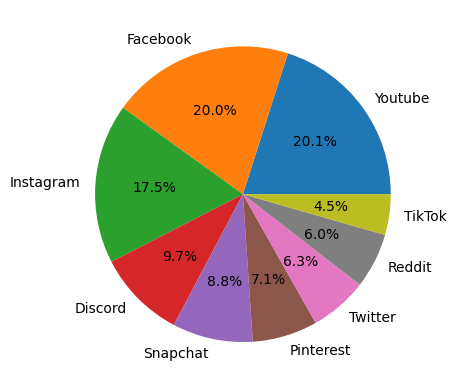

In [15]:
fig, ax = mp.subplots()
ax.pie(percents,autopct='%1.1f%%',labels =labels)

Subjects were asked which platforms they used most often. Here is how often each platform was mentioned. 